In [2]:
# Imports
import numpy as np
import pandas as pd
import wfdb
import matplotlib.pyplot as plt
import os
import re
from scipy import signal

In [187]:
# Functions
def remove_year_from_hea(filename: str) -> None:
    '''
    Removes year from header file in wfdb (.hea) on line 1. Run before reading file with wfdb functions. Does not overwrite original date,
    where the function will rename original file to '***_original.hea'.

    PS: Very rudementary function: will always remove 4 digit strings (regex based) if they appear to the left of newline char (\n).

    Args:
        filepath to .hea-file (without .hea extension)
    
    Attributes:
        None
    '''
    
    # Open file
    with open(filename + ".hea", "r", encoding='utf-8') as f:
        
        # Read lines
        text = f.readlines()

        # Modify line 1 (with regex)
        pattern = '\s\d{4}(?=(\\n))'
        if not re.search(pattern, text[0]):
            print("Year is already removed. Doing nothing.")
            return(1)
        else:
            print("Removing year from line 1")
            modified_line = re.sub(pattern, '', text[0])
            text[0] = modified_line
    
    # Rename original file
    os.rename(filename + '.hea', filename + '_original.hea')
    
    # Create new file
    with open(filename + ".hea", "w", encoding='utf-8') as f:
        f.writelines(text)

In [195]:
# Test functions
remove_year_from_hea("data-raw/cardiovascular_complications/Data/ECG/S0033ECG")

# text = 'S0576ECG 8 1000 392658\n'
# pattern = '\s\d{4}(?=(\\n))'
# if not re.search(pattern, text):
 #   print(True)


# f = open("data-raw/cardiovascular_complications/Data/ECG/S0068ECG.hea")
# print(f.readlines(1))
# pattern = '\s\d{4}(?=(\\n))'
# org_string = "S0068ECG 8 1000 377790 2010\n"

# mod_string = re.sub(pattern, '', org_string )
# print(mod_string)


Removing year from line 1


# Cardiometabolic data

In [219]:
remove_year_from_hea("data-raw/cardiovascular_complications/Data/ECG/S0033ECG")
cardio_record_1 = wfdb.rdrecord('data-raw/cardiovascular_complications/Data/ECG/S0033ECG')

display(cardio_record_1.__dict__)
print('measurement in minutes:', cardio_record_1.p_signal.shape[0] / cardio_record_1.fs / 60)

Year is already removed. Doing nothing.


{'record_name': 'S0033ECG',
 'n_sig': 8,
 'fs': 1000,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 595176,
 'base_time': None,
 'base_date': None,
 'comments': [],
 'sig_name': ['ecg_0',
  'ecg_1',
  'sensor_0',
  'sensor_1',
  'emg_0',
  'emg_1',
  'accelerometer_0',
  'accelerometer_1'],
 'p_signal': array([[ 2.600e+01,  1.200e+01,  6.270e+02, ...,  8.125e+03, -7.000e+00,
          3.300e+01],
        [ 2.900e+01,  9.000e+00,  6.270e+02, ...,  8.123e+03, -5.000e+00,
          3.300e+01],
        [ 2.600e+01,  6.000e+00,  6.270e+02, ...,  8.124e+03, -5.000e+00,
          3.400e+01],
        ...,
        [ 1.300e+01,  1.500e+01,  6.170e+02, ...,  8.122e+03,  3.300e+01,
          9.100e+01],
        [ 3.000e+00,  1.600e+01,  6.170e+02, ...,  8.121e+03,  3.400e+01,
          9.000e+01],
        [ 2.000e+00,  1.500e+01,  6.170e+02, ...,  8.121e+03,  3.500e+01,
          8.800e+01]]),
 'd_signal': None,
 'e_p_signal': None,
 'e_d_signal': None,
 'file_name': ['S0033ECG.dat',
 

measurement in minutes: 9.9196


In [ ]:
# Calculate time by taking shape of signal (of numpy array) vs samping frequency (hz)


In [238]:
cardio_record_1.p_signal.shape
cardio_record_1.p_signal[0]

array([ 2.600e+01,  1.200e+01,  6.270e+02, -1.650e+03,  8.084e+03,
        8.125e+03, -7.000e+00,  3.300e+01])

Text(0.5, 1.0, 'S0033ECG')

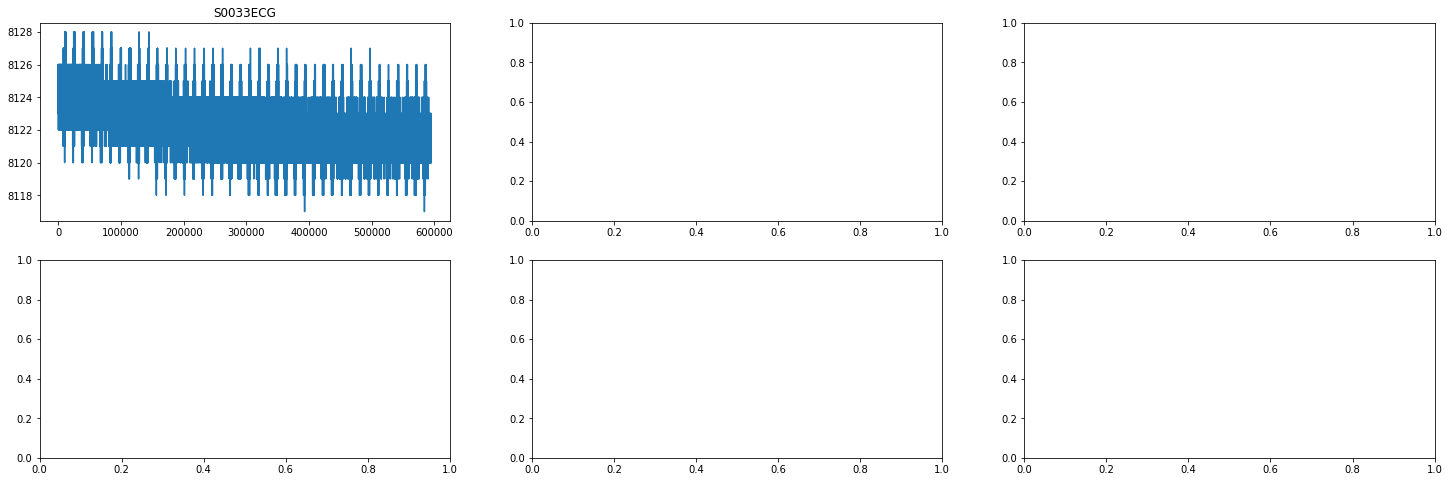

In [245]:
figure, axis = plt.subplots(2, 3, figsize=(25, 8))
L = 3000
axis[0, 0].plot(cardio_record_1.p_signal[0:-1, 5])
axis[0, 0].set_title(cardio_record_1.record_name)

# PTB-xl

In [ ]:
ptb_record_1 = wfdb.rdrecord('data-raw/ptb-xl/records500/00000/00001_hr')
display(ptb_record_1.__dict__)

### Convert to hdf5.py


In [11]:
# Imports
import h5py
import wfdb
import numpy as np

Read in data

In [10]:
# 
record = wfdb.rdrecord('data-raw/ptb-xl/records500/00000/00001_hr')

Seperate to numpy arrays

In [492]:
# Extract signal
signal_raw = np.array(record.p_signal)

# Cleave signal into correct size (4096) - Trim on both sides
signal_cut = signal_raw.shape[0] - 4096
signal_top = int(signal_raw.shape[0] - (signal_cut/2))
signal_bottom = int(signal_cut/2)
signal = signal_raw[signal_bottom:signal_top]



a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6]])

np.vstack((a, 0))
print(a.shape)
print(b.shape)
# Combine signals
# a_3d_array = np.zeros((0, 4096, 12))
signal1 = signal
# list()
signal = np.stack((signal,signal), axis=0)
print(signal.shape)
# print(np.dstack(signal,signal1).shape)

a = np.append([[1, 2, 3], [4, 5, 6]], [[7, 8, 9]], axis=0)
print(a.shape)
# print(a_3d_array.shape)

# Extract exam id and convert to int
exam_id = record.record_name
regex_pattern = '_hr'
exam_id = int(re.sub(regex_pattern, '', exam_id))
print(signal.shape)

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 2 and the array at index 1 has size 1

In [15]:
a = np.array([[1, 2], [3, 4]])
b = np.array([[1, 2], [3, 4]])

result_arr = [a, b, a, b]

result_arr = np.stack(result_arr, axis=0)

print(a.shape)
print(result_arr.shape[0])

(2, 2)
4


Create h5py file

In [452]:
os.remove('data/test.hdf5')
with h5py.File('data/test.hdf5', 'w') as f:
    # f.create_group('exam_id', (20001,), type='int64')
    # f.create_group('tracings', (20001, 4096, 12), type='<f4')
    f.create_dataset("tracings", (2, 4096, 12), data=signal, dtype='<f4')
    f.create_dataset("exam_id", data=exam_id, dtype='int64')

    # f.create_group('exam_id',(100,))

In [399]:
test_f = h5py.File("data/test.hdf5", "r")
print(list(test_f.keys()))
print(f"Tracing shape: {test_f['tracings'].shape}")
print(f"Tracing dtype: {test_f['tracings'].dtype}")
print(f"Tracing shape: {test_f['exam_id'].shape}")
print(f"Tracing dtype: {test_f['exam_id'].dtype}")

['exam_id', 'tracings']
Tracing shape: (2, 4096, 12)
Tracing dtype: float32
Tracing shape: ()
Tracing dtype: int64


In [281]:
f = h5py.File('foo.hdf5','w')
grp = f.create_group("bar", (,), dtype='<f4')
f.create_group("bars", (100,))
list(f.keys())

['bar', 'bars']

#### Open file w. wfdb

In [246]:
ptb_record_1 = wfdb.rdrecord('data-raw/ptb-xl/records500/00000/00001_hr')


In [355]:
# Testing - Look at other files
f = h5py.File("data-raw/code-15/exams_part0.hdf5", "r")
test_f = h5py.File("data/test.hdf5", "r")

In [16]:
# Testing - Look at other files
f = h5py.File("data-raw/test.hdf5", "r")

In [17]:
list(f.keys())


['exam_id', 'tracings']

In [22]:
dset = f['exam_id']

In [30]:
dset[104]

58

ptb_record_1 = wfdb.rdrecord('data-raw/ptb-xl/records500/00000/00001_hr')
    

In [264]:
dset.dtype

dtype('int64')

NameError: name 'sample_dict' is not defined